# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [1]:
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [2]:
!head -2 /data/afarbin/DLClass/HiggsML/training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s


Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [3]:
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

250001 /data/afarbin/DLClass/HiggsML/training.csv


You can strip off the first line into a new file in your Exam directory:

In [4]:
!tail -250000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv

In [5]:
!head -2 mytraining.csv

100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
100001,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b


In [6]:
!tail -550000 test.csv > mytest.csv

In [7]:
!head -2 mytest.csv

350000,-999.0,79.589,23.916,3.036,-999.0,-999.0,-999.0,0.903,3.036,56.018,1.536,-1.404,-999.0,22.088,-0.54,-0.609,33.93,-0.504,-1.511,48.509,2.022,98.556,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0
350001,106.398,67.49,87.949,49.994,-999.0,-999.0,-999.0,2.048,2.679,132.865,1.777,-1.204,-999.0,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.0,-999.0,-999.0,47.575


In [8]:
TempNames='EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label'
VarNames=TempNames.split(',')

In [9]:
import pandas as pd
filename="mytraining.csv"
filename1="mytest.csv"
df=pd.read_csv(filename,names=VarNames)
df1=pd.read_csv(filename1,names=VarNames)

In [10]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [11]:
df1

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,NaN,NaN
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,NaN,NaN
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,NaN,NaN
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,NaN,NaN
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213,NaN,NaN
5,350005,95.709,94.168,66.280,14.719,-999.000,-999.000,-999.000,3.065,14.719,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,NaN,NaN
6,350006,85.798,49.059,66.131,37.074,-999.000,-999.000,-999.000,2.253,1.713,...,1,36.990,-3.277,1.369,-999.000,-999.000,-999.000,36.990,NaN,NaN
7,350007,429.273,75.057,234.610,71.019,0.590,174.261,2.278,4.287,4.368,...,2,119.440,1.243,-0.739,59.619,1.833,2.788,179.059,NaN,NaN
8,350008,70.958,66.329,60.950,0.758,-999.000,-999.000,-999.000,2.370,0.758,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,NaN,NaN
9,350009,110.539,2.820,62.136,179.753,3.256,337.201,-2.059,1.092,27.018,...,2,115.867,-0.859,1.961,40.427,2.397,1.479,156.294,NaN,NaN


In [12]:
df_sig=df[df.Label=='s']
df_bkg=df[df.Label=='b']

DER_mass_MMC


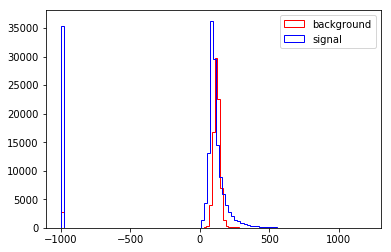

DER_mass_transverse_met_lep


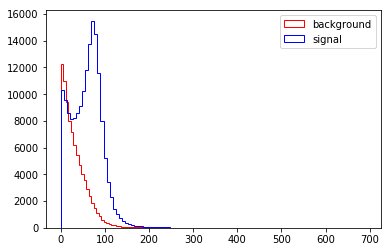

DER_mass_vis


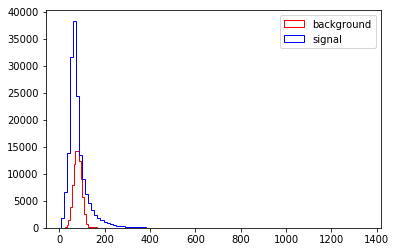

DER_pt_h


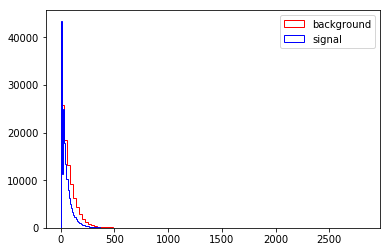

DER_deltaeta_jet_jet


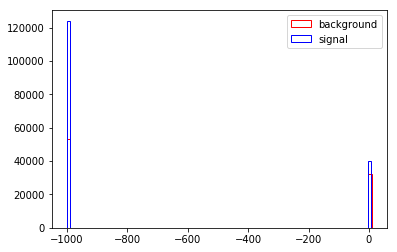

DER_mass_jet_jet


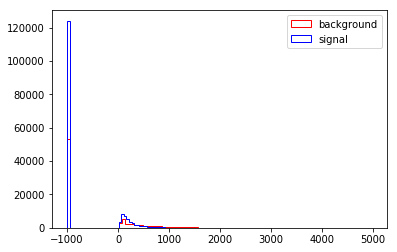

DER_prodeta_jet_jet


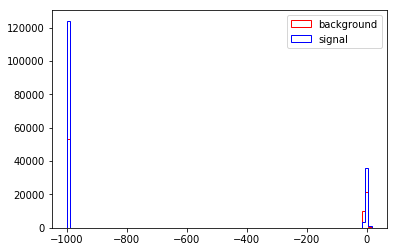

DER_deltar_tau_lep


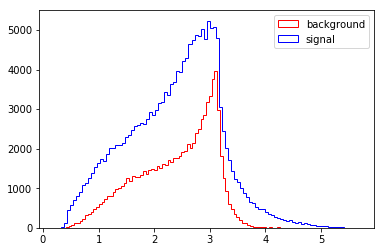

DER_pt_tot


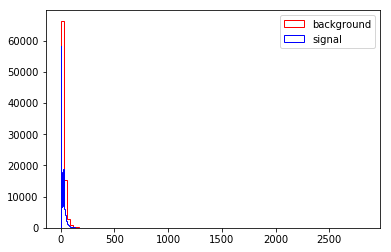

DER_sum_pt


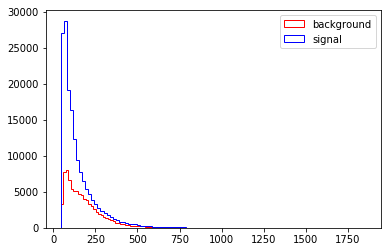

DER_pt_ratio_lep_tau


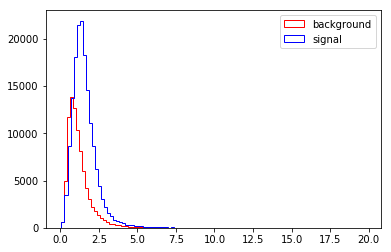

DER_met_phi_centrality


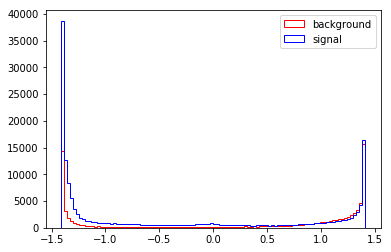

DER_lep_eta_centrality


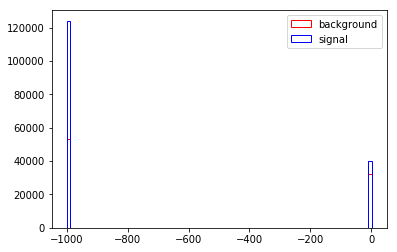

PRI_tau_pt


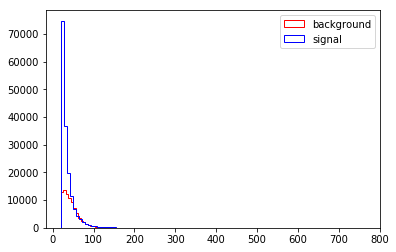

PRI_tau_eta


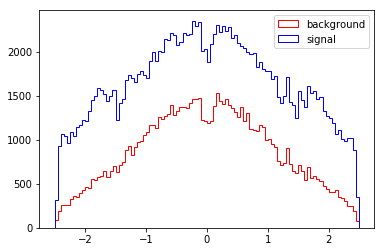

PRI_tau_phi


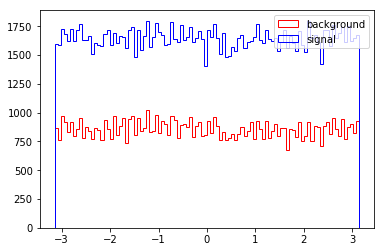

PRI_lep_pt


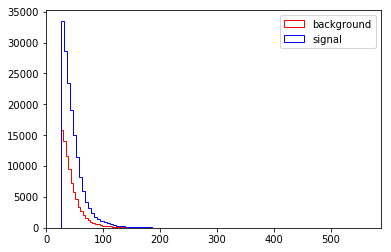

PRI_lep_eta


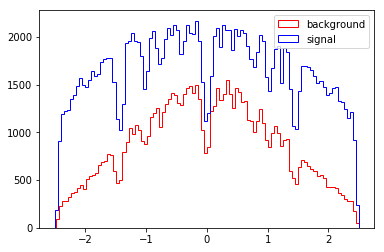

PRI_lep_phi


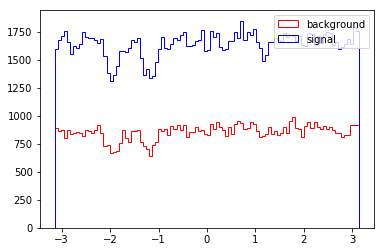

PRI_met


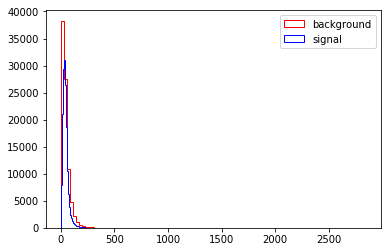

PRI_met_phi


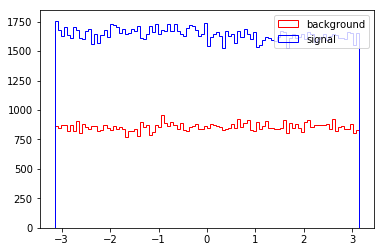

PRI_met_sumet


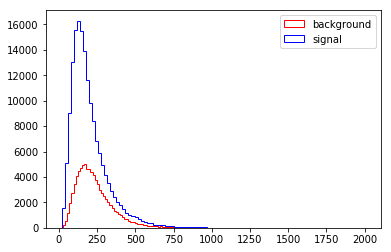

PRI_jet_num


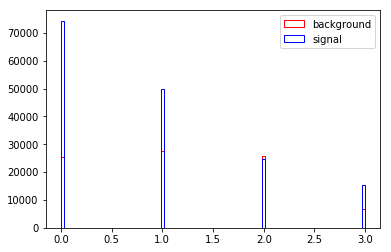

PRI_jet_leading_pt


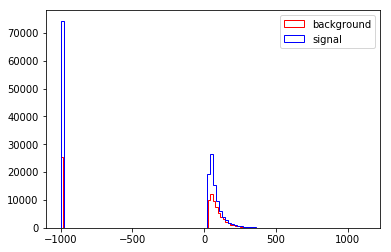

PRI_jet_leading_eta


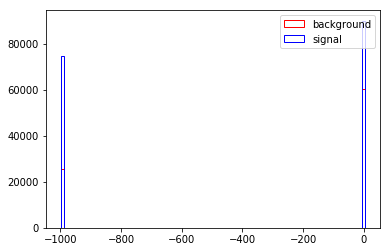

PRI_jet_leading_phi


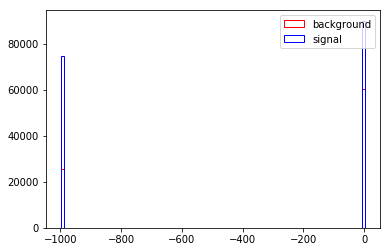

PRI_jet_subleading_pt


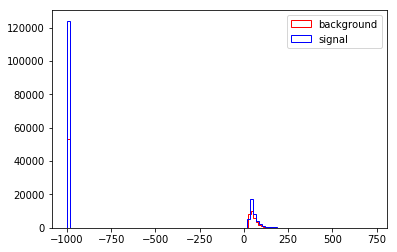

PRI_jet_subleading_eta


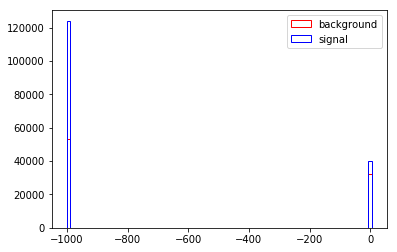

PRI_jet_subleading_phi


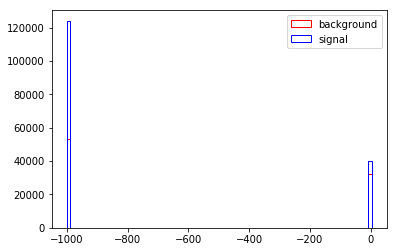

PRI_jet_all_pt


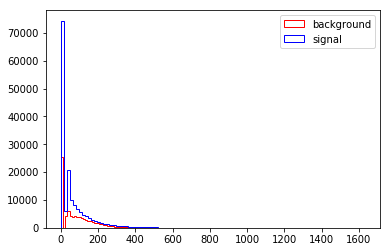

In [53]:
import matplotlib.pyplot as plt
import pickle

for var in VarNames[1:31]:
    print var
    plt.figure()
    plt.hist(df_sig[var],bins=100,histtype="step", color="red",label="background",stacked=True)
    plt.hist(df_bkg[var],bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [37]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

Cutoff=150000
Train_Sample=df[:Cutoff]
Test_Sample=df[Cutoff:]

X_train=Train_Sample[VarNames[1:31]]
y_train=Train_Sample['Label']

X_test=Test_Sample[VarNames[1:31]]
y_test=Test_Sample['Label']

Test_sig=Test_Sample[Test_Sample.Label=='s']
Test_bkg=Test_Sample[Test_Sample.Label=='b']

X_Unlabeled=df1[VarNames[1:33]]

In [57]:
Fisher.fit(X_train,y_train)

FisherPickle=pickle.dumps(Fisher)

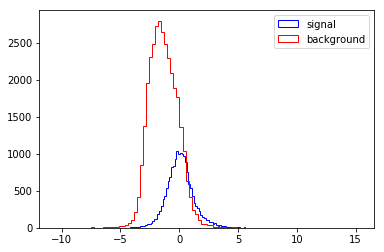

In [55]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

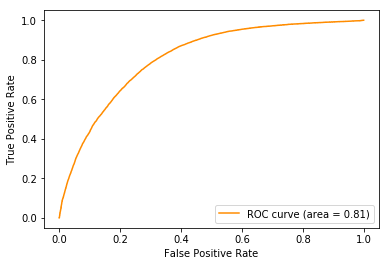

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, Fisher.decision_function(X_test),'s')

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [41]:
Classifier_Test=Fisher.predict(X_test)
Classifier_Sig_Indices=[]

for i in range(0,len(Classifier_Test)):
    if Classifier_Test[i]=='s':
        Classifier_Sig_Indices.append(i)

In [42]:
Weights=[]
Sample_Sig_Indices=[]
Sample_Bkg_Indices=[]

for i in range(0,len(Test_Sample)):
    Event=Test_Sample[i:i+1]
    Class=Event["Label"]
    Weight=float(Event["Weight"])
    Weights.append(Weight)
    if Class.any()=='s':
        Sample_Sig_Indices.append(i)
    else:
        Sample_Bkg_Indices.append(i)

n_b=len(Sample_Bkg_Indices)
n_s=len(Sample_Sig_Indices)
N_s=0
N_b=0

for i in Sample_Sig_Indices:
    N_s=N_s+Weights[i]
    
for i in Sample_Bkg_Indices:
    N_b=N_b+Weights[i]

In [43]:
s=0
b=0
b_reg=10
for i in Classifier_Sig_Indices:
    if i in Sample_Sig_Indices:
        s=s+Weights[i]
    elif i in Sample_Bkg_Indices:
        b=b+Weights[i]
        
print s,'\n',b

61.7283746823 
5331.80639077


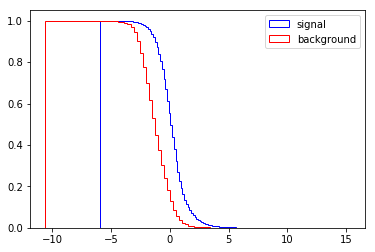

63


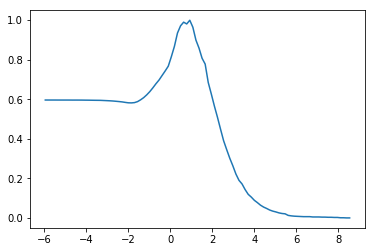

Max significance at  0.92752530804  of 0.998831002045


(0.92752530803996702, 0.99883100204452069, 47)

In [44]:
import numpy as np

def PlotSignificance(N_S,N_B, N_S_min=1,b_reg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    significance=np.sqrt(2*[(((N_S*eff_sig)+(N_B*eff_bkg)+b_reg)*np.log(1+((N_S*eff_sig)/((N_B*eff_bkg)+b_reg))))-(N_S*eff_sig)])
    plt.figure()
    plt.plot(bins_sig[:-1],significance[0])
    
    max_sign=np.max(significance[0][good_bins])
    max_signI=np.argmax(significance[0][good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI

PlotSignificance(s,b)

In [45]:
Unlabeled_Sig_Indices=[]
Unlabeled_Bkg_Indices=[]

Unlabeled_Test=Fisher.predict(X_Unlabeled[VarNames[1:31]])
Unlabeled_Test

for i in range(0,len(Unlabeled_Test)):
    if Unlabeled_Test[i]=='s':
        Unlabeled_Sig_Indices.append(i)
    else:
        Unlabeled_Bkg_Indices.append(i)
        
TrainedN_s=float(len(Unlabeled_Sig_Indices))
TrainedN_b=float(len(Unlabeled_Bkg_Indices))

print TrainedN_s,'\n',TrainedN_b,'\n',s/b,'\n',TrainedN_s/TrainedN_b

144350.0 
405650.0 
0.0115773848782 
0.355848637988


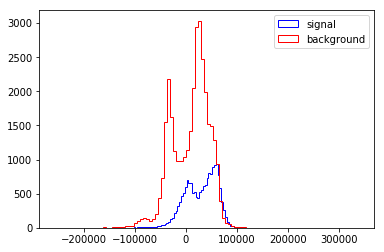

In [58]:
import sklearn.linear_model as LN
SGDC=LN.SGDClassifier()

SGDC.fit(X_train,y_train)
SGDCPickle=pickle.dumps(SGDC)

plt.figure()
plt.hist(SGDC.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(SGDC.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

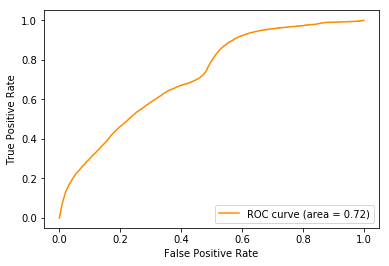

In [47]:
fpr, tpr, _ = roc_curve(y_test, SGDC.decision_function(X_test),'s')

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [48]:
Classifier_Test=SGDC.predict(X_test)
Classifier_Sig_Indices=[]

for i in range(0,len(Classifier_Test)):
    if Classifier_Test[i]=='s':
        Classifier_Sig_Indices.append(i)

In [49]:
Weights=[]
Sample_Sig_Indices=[]
Sample_Bkg_Indices=[]

for i in range(0,len(Test_Sample)):
    Event=Test_Sample[i:i+1]
    Class=Event["Label"]
    Weight=float(Event["Weight"])
    Weights.append(Weight)
    if Class.any()=='s':
        Sample_Sig_Indices.append(i)
    else:
        Sample_Bkg_Indices.append(i)

n_b=len(Sample_Bkg_Indices)
n_s=len(Sample_Sig_Indices)
N_s=0
N_b=0

for i in Sample_Sig_Indices:
    N_s=N_s+Weights[i]
    
for i in Sample_Bkg_Indices:
    N_b=N_b+Weights[i]

In [50]:
s=0
b=0
b_reg=10
for i in Classifier_Sig_Indices:
    if i in Sample_Sig_Indices:
        s=s+Weights[i]
    elif i in Sample_Bkg_Indices:
        b=b+Weights[i]
        
print s,'\n',b

18.0459845999 
1989.48469759


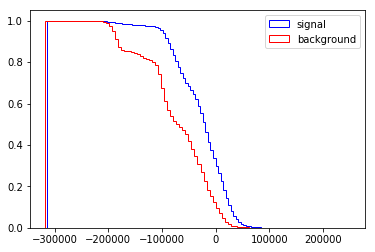

75


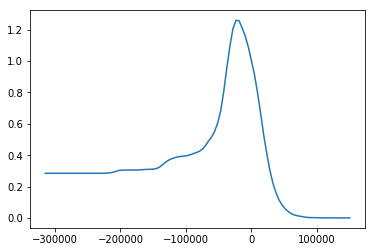

Max significance at  -23484.6085362  of 1.26048575214


(-23484.608536163694, 1.2604857521358181, 62)

In [51]:
def PlotSignificance(N_S,N_B, N_S_min=1,b_reg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(SGDC.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(SGDC.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    significance=np.sqrt(2*[(((N_S*eff_sig)+(N_B*eff_bkg)+b_reg)*np.log(1+((N_S*eff_sig)/((N_B*eff_bkg)+b_reg))))-(N_S*eff_sig)])
    plt.figure()
    plt.plot(bins_sig[:-1],significance[0])
    
    max_sign=np.max(significance[0][good_bins])
    max_signI=np.argmax(significance[0][good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI

PlotSignificance(s,b)

In [52]:
Unlabeled_Sig_Indices=[]
Unlabeled_Bkg_Indices=[]

Unlabeled_Test=SGDC.predict(X_Unlabeled[VarNames[1:31]])
Unlabeled_Test

for i in range(0,len(Unlabeled_Test)):
    if Unlabeled_Test[i]=='s':
        Unlabeled_Sig_Indices.append(i)
    else:
        Unlabeled_Bkg_Indices.append(i)
        
TrainedN_s=float(len(Unlabeled_Sig_Indices))
TrainedN_b=float(len(Unlabeled_Bkg_Indices))

print TrainedN_s,'\n',TrainedN_b,'\n',s/b,'\n',TrainedN_s/TrainedN_b

92171.0 
457829.0 
0.00907068278623 
0.201321890924


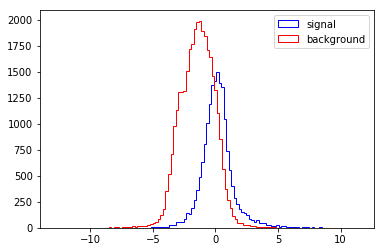

In [59]:
import sklearn.linear_model as LN
LogReg=LN.LogisticRegression()

LogReg.fit(X_train,y_train)
LogRegPickle=pickle.dumps(LogReg)

plt.figure()
plt.hist(LogReg.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(LogReg.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

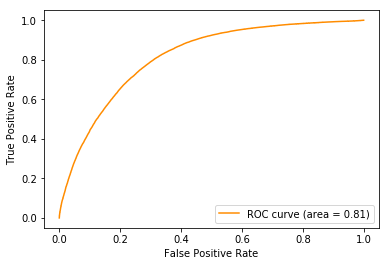

In [31]:
fpr, tpr, _ = roc_curve(y_test, LogReg.decision_function(X_test),'s')

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [32]:
Classifier_Test=LogReg.predict(X_test)
Classifier_Sig_Indices=[]

for i in range(0,len(Classifier_Test)):
    if Classifier_Test[i]=='s':
        Classifier_Sig_Indices.append(i)

In [33]:
Weights=[]
Sample_Sig_Indices=[]
Sample_Bkg_Indices=[]

for i in range(0,len(Test_Sample)):
    Event=Test_Sample[i:i+1]
    Class=Event["Label"]
    Weight=float(Event["Weight"])
    Weights.append(Weight)
    if Class.any()=='s':
        Sample_Sig_Indices.append(i)
    else:
        Sample_Bkg_Indices.append(i)

n_b=len(Sample_Bkg_Indices)
n_s=len(Sample_Sig_Indices)
N_s=0
N_b=0

for i in Sample_Sig_Indices:
    N_s=N_s+Weights[i]
    
for i in Sample_Bkg_Indices:
    N_b=N_b+Weights[i]

In [34]:
s=0
b=0
b_reg=10
for i in Classifier_Sig_Indices:
    if i in Sample_Sig_Indices:
        s=s+Weights[i]
    elif i in Sample_Bkg_Indices:
        b=b+Weights[i]
        
print s,'\n',b

135.24770041 
11467.0960546


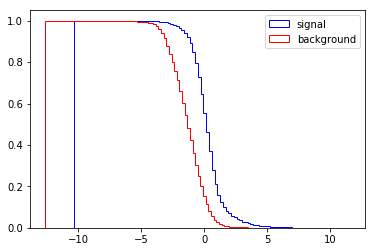

70


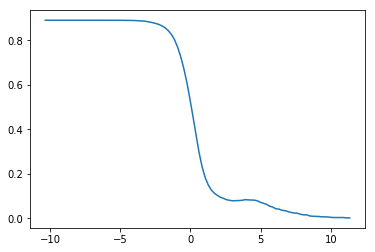

Max significance at  -8.37352431828  of 0.890956252028


(-8.3735243182840176, 0.89095625202826212, 9)

In [35]:
def PlotSignificance(N_S,N_B, N_S_min=1,b_reg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(LogReg.decision_function(Test_sig[VarNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(LogReg.decision_function(Test_bkg[VarNames[1:31]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    significance=np.sqrt(2*[(((N_S*eff_sig)+(N_B*eff_bkg)+b_reg)*np.log(1+((N_S*eff_sig)/((N_B*eff_bkg)+b_reg))))-(N_S*eff_sig)])
    plt.figure()
    plt.plot(bins_sig[:-1],significance[0])
    
    max_sign=np.max(significance[0][good_bins])
    max_signI=np.argmax(significance[0][good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI

PlotSignificance(s,b)

In [36]:
Unlabeled_Sig_Indices=[]
Unlabeled_Bkg_Indices=[]

Unlabeled_Test=LogReg.predict(X_Unlabeled[VarNames[1:31]])
Unlabeled_Test

for i in range(0,len(Unlabeled_Test)):
    if Unlabeled_Test[i]=='s':
        Unlabeled_Sig_Indices.append(i)
    else:
        Unlabeled_Bkg_Indices.append(i)
        
TrainedN_s=float(len(Unlabeled_Sig_Indices))
TrainedN_b=float(len(Unlabeled_Bkg_Indices))

print TrainedN_s,'\n',TrainedN_b,'\n',s/b,'\n',TrainedN_s/TrainedN_b

150580.0 
399420.0 
0.0117944159328 
0.376996645135
